In [1]:
from jinja2 import Template

In [2]:
cars = [
    {'model': 'Ауди', 'price': 23000},
    {'model': 'Шкода', 'price': 17300},
    {'model': 'Вольво', 'price': 44300},
    {'model': 'Фольксваген', 'price': 21300}
]

In [3]:
tp1 = "Total cars price {{ cs | sum(attribute='price') }}"
tm = Template(source=tp1)
msg = tm.render(cs=cars)
msg

'Total cars price 105900'

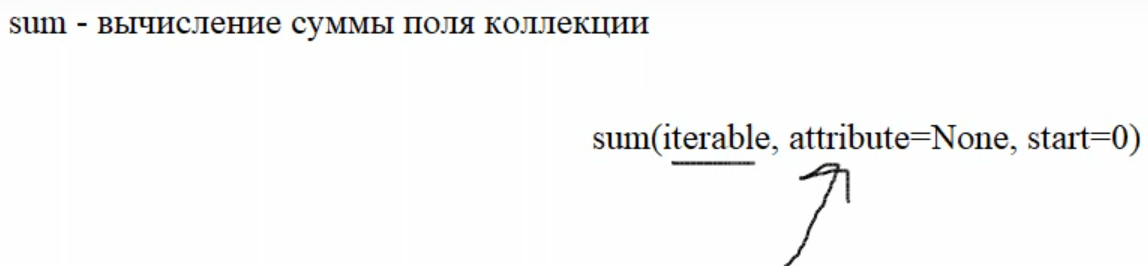

In [4]:
digits = [1, 2, 3, 4, 5]
tm2 = Template("Numbers sum: {{ numbers | sum }}")
result = tm2.render(numbers=digits)
result

'Numbers sum: 15'

### Фильтры Jinja2
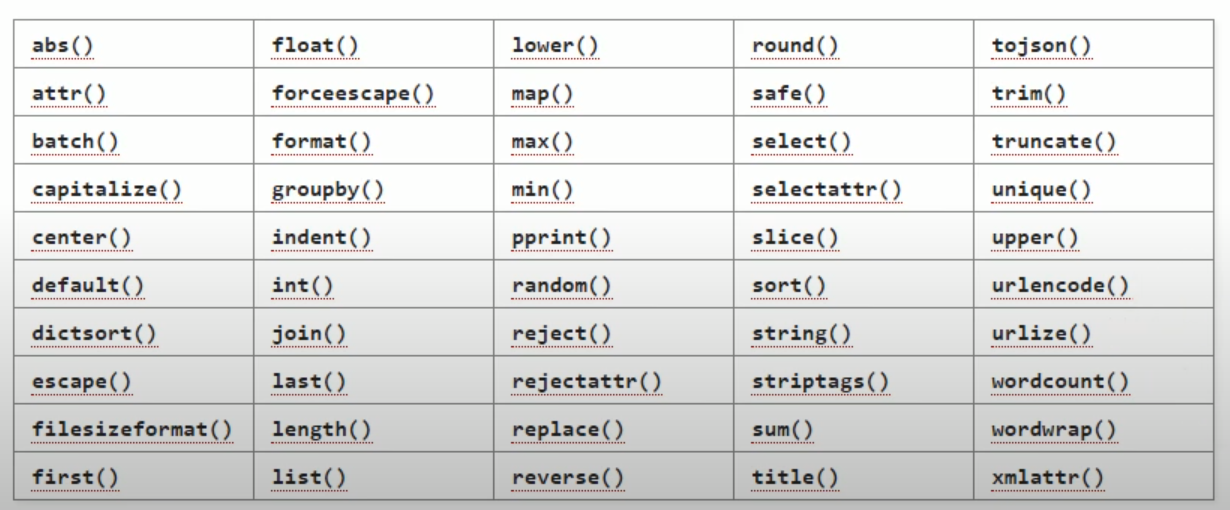

In [5]:
tm3 = Template(source="Max price of the cars is {{ exp_car | max(attribute='price') }}")
result = tm3.render(exp_car=cars)
result

"Max price of the cars is {'model': 'Вольво', 'price': 44300}"

In [6]:
tm3 = Template(source="Max price of the most expensive car is {{ (exp_car | max(attribute='price')).price }}")
result = tm3.render(exp_car=cars)
result

'Max price of the most expensive car is 44300'

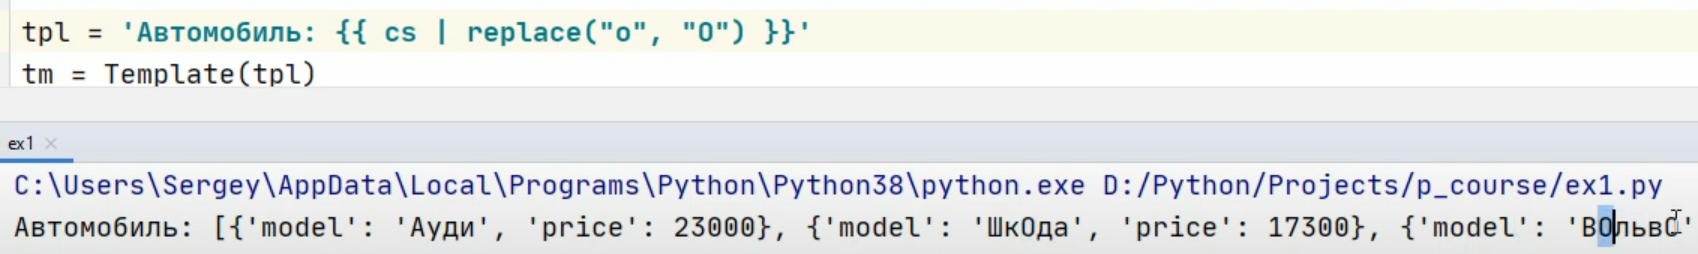

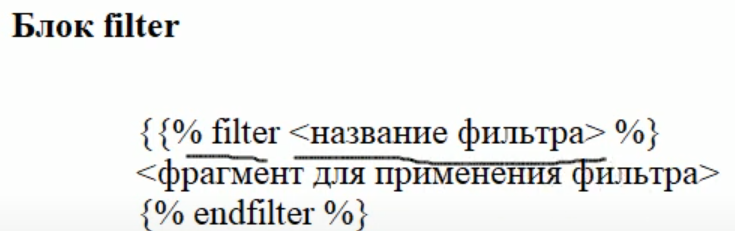

In [7]:
persons = [
    {"name": "Алексей", "old": 18, "weight": 78.5},
    {"name": "Николай", "old": 28, "weight": 82.3},
    {"name": "Иван", "old": 33, "weight": 94.0}
]

In [8]:
tpl = """
{%- for u in users -%}
{% filter upper %}{{u.name}}{% endfilter %}
{% endfor -%}
"""

In [9]:
tm = Template(tpl)
msg = tm.render(users=persons)
print(msg)

АЛЕКСЕЙ
НИКОЛАЙ
ИВАН



In [10]:
tmp = """
{%- for car in cars -%}
{% filter lower %}{{ car.model }}{% endfilter %}
{% endfor -%}
"""

In [11]:
tm = Template(tmp)
result = tm.render(cars=cars)
result

'ауди\nшкода\nвольво\nфольксваген\n'

In [12]:
print(result)

ауди
шкода
вольво
фольксваген



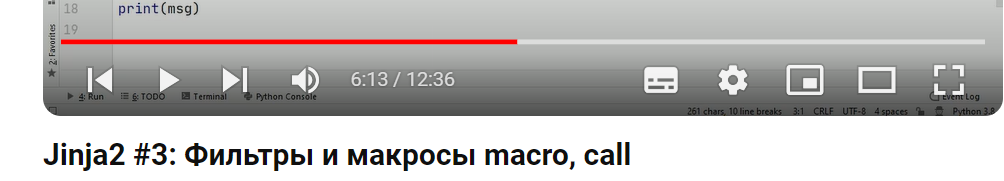

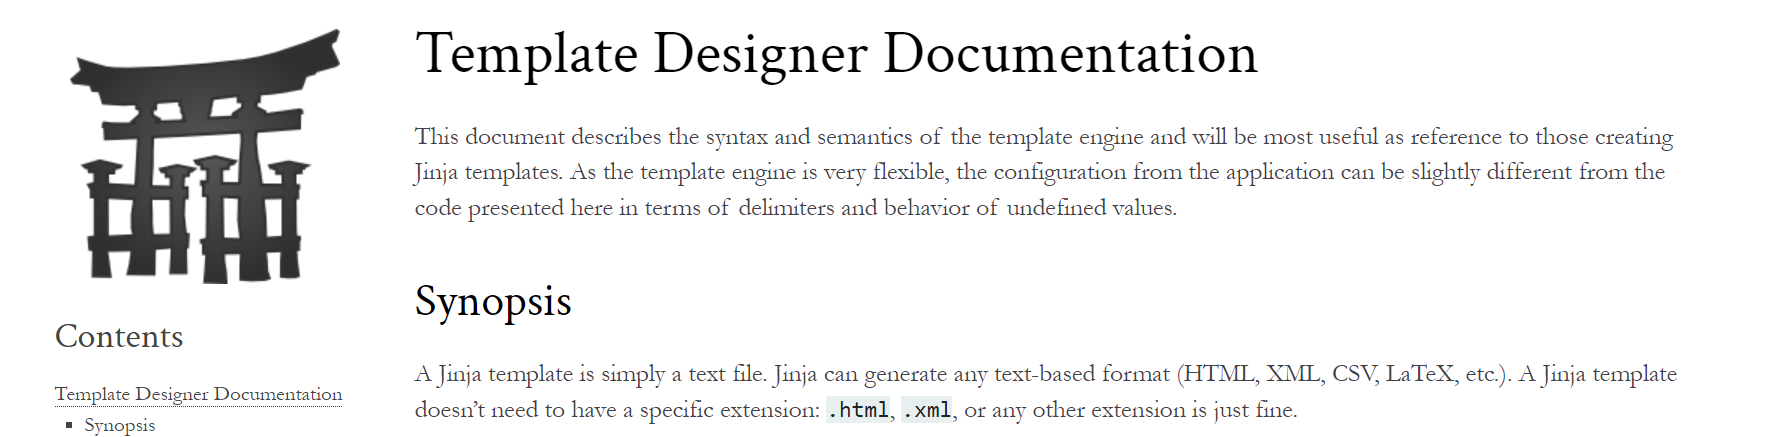

In [13]:
html = '''
{% macro input(name, value='', type='text', size=20) -%}
    <input type="{{ type }}" name="{{ name }}" value="{{ value|e }}" size="{{ size }}">
{%- endmacro %}
 
{{ input('username') }}
{{ input('email') }}
{{ input('password') }}
'''

In [14]:
tm = Template(html)  # Формируем шаблон
msg = tm.render()  # Обрабатываем шаблон
print(msg)



 
<input type="text" name="username" value="" size="20">
<input type="text" name="email" value="" size="20">
<input type="text" name="password" value="" size="20">


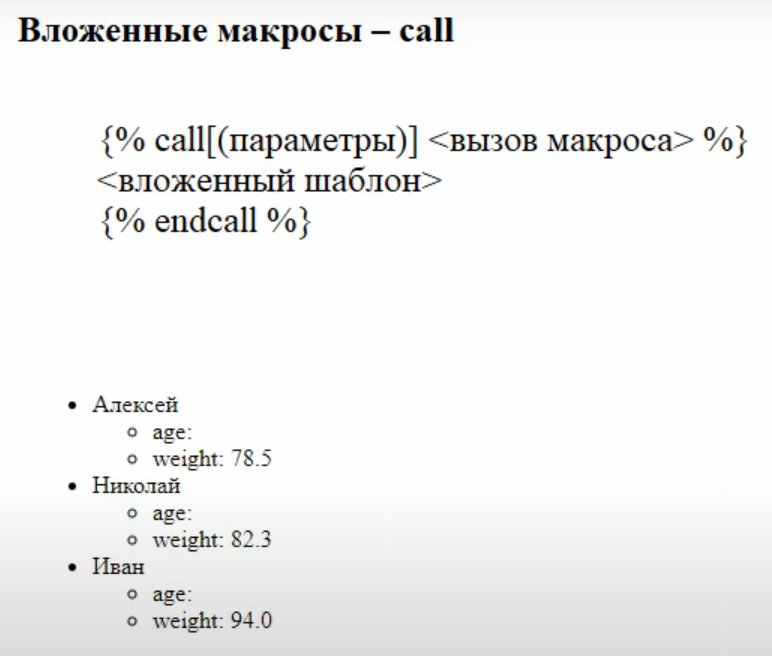

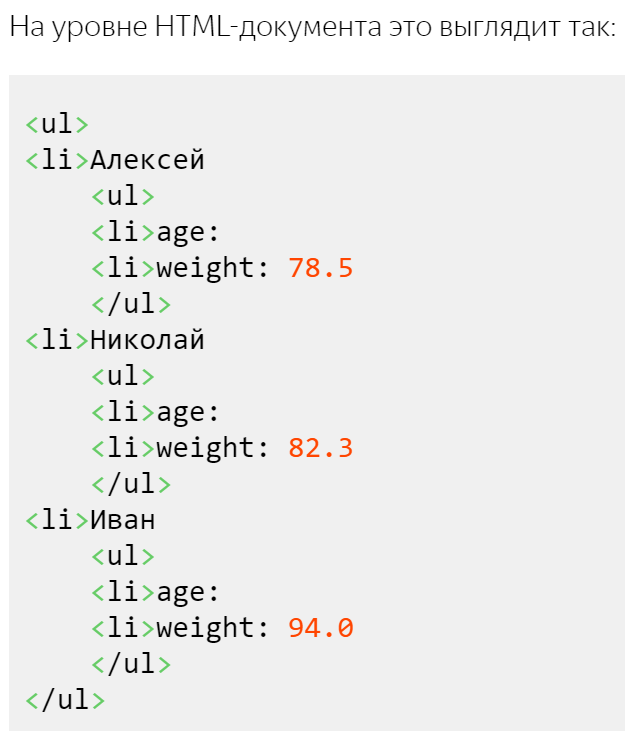

In [15]:
persons = [
    {"name": "Алексей", "old": 18, "weight": 78.5},
    {"name": "Николай", "old": 28, "weight": 82.3},
    {"name": "Иван", "old": 33, "weight": 94.0}
]

In [16]:
html = '''
{% macro list_users(list_of_user) -%}
<ul>
{% for u in users -%}
    <li>{{u.name}} 
{%- endfor %}
</ul>
{%- endmacro %}
 
{{list_users(users)}}
'''
 
tm = Template(html)
msg = tm.render(users = persons)
 
print(msg)



 
<ul>
<li>Алексей<li>Николай<li>Иван
</ul>


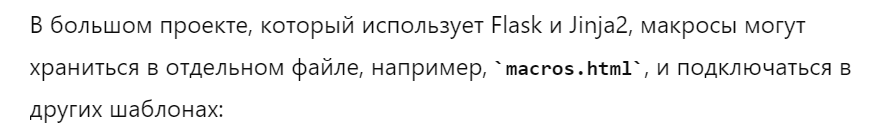

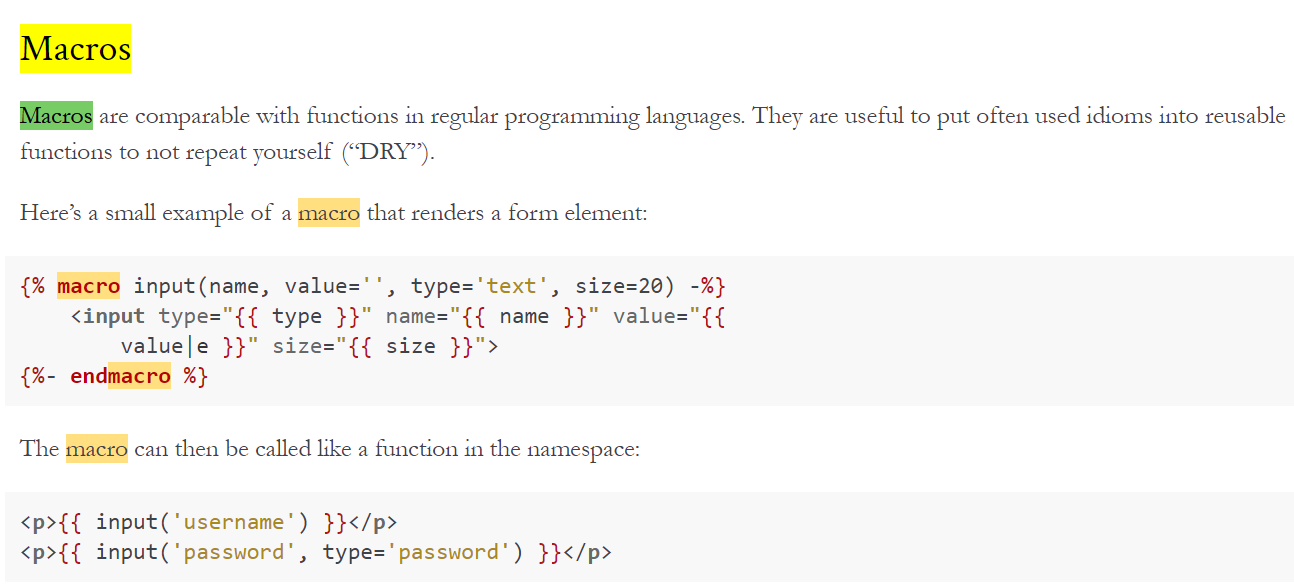
### Страница из документации

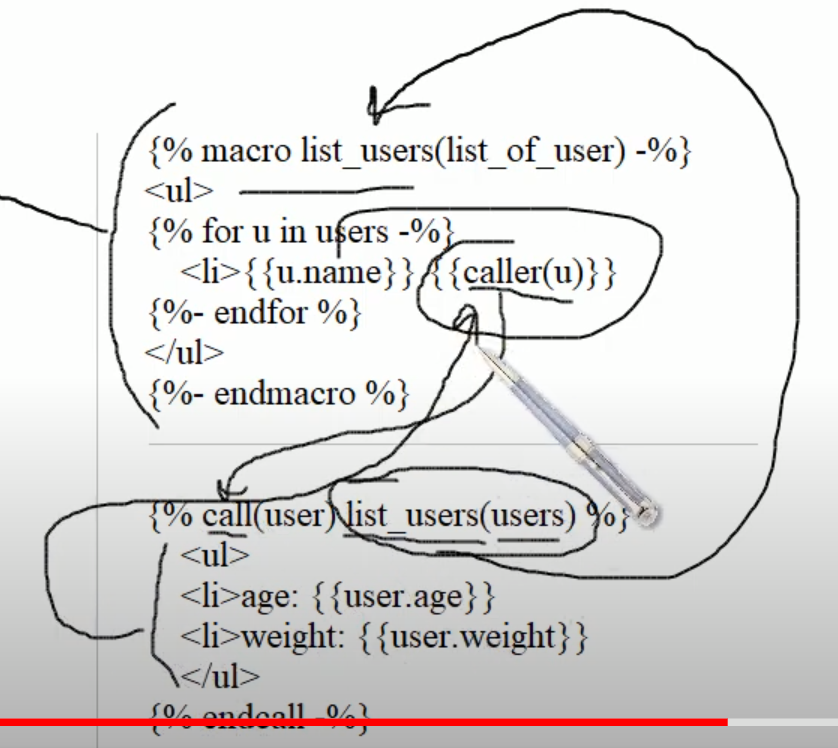
### Нижний блок подставляется в caller

In [17]:
html = '''
{% macro list_users(list_of_user) -%}
<ul>
{% for u in list_of_user -%}
    <li>{{u.name}} {{caller(u)}}
{%- endfor %}
</ul>
{%- endmacro %}
 
{% call(user) list_users(users) %}
    <ul>
    <li>age: {{user.old}}
    <li>weight: {{user.weight}}
    </ul>
{% endcall -%}
'''

tm = Template(html)
msg = tm.render(users = persons)
 
print(msg)



 
<ul>
<li>Алексей 
    <ul>
    <li>age: 18
    <li>weight: 78.5
    </ul>
<li>Николай 
    <ul>
    <li>age: 28
    <li>weight: 82.3
    </ul>
<li>Иван 
    <ul>
    <li>age: 33
    <li>weight: 94.0
    </ul>

</ul>


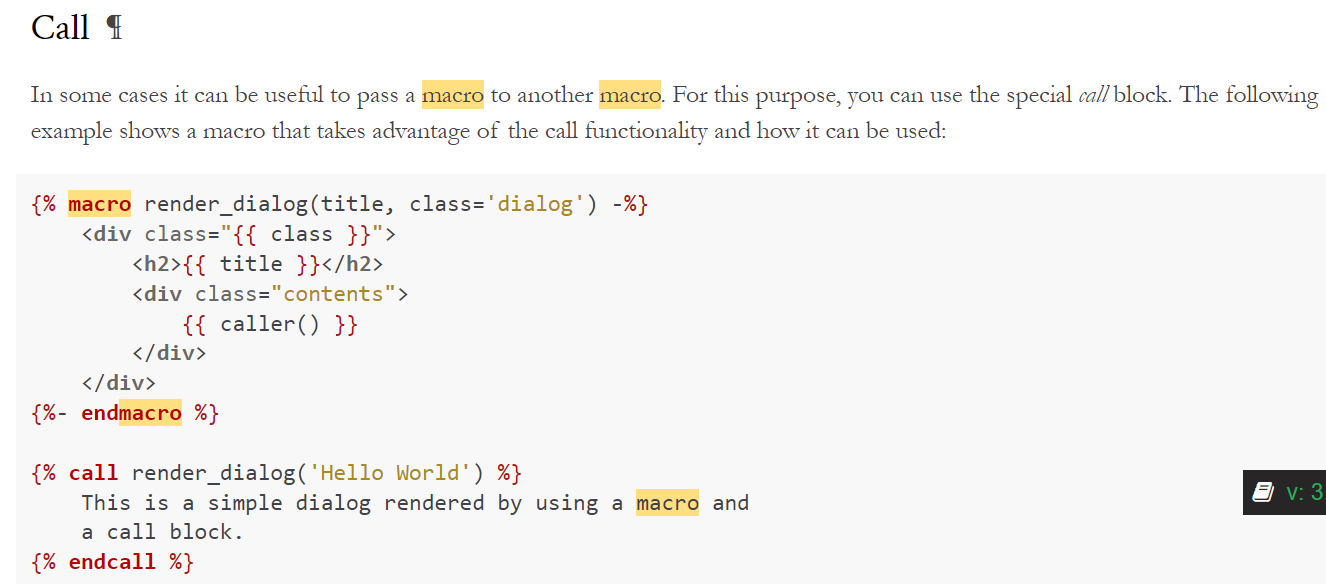